# Importando as libs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importando o dataset

In [2]:
dados = pd.read_csv('dados/Consumo_cerveja.csv', ';')

# Informações iniciais do dataset


In [3]:
dados.shape

(365, 7)

In [4]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [6]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


# Descrição das variáveis
- data = dia de coleta.
- temp_media = média da temperatura ambiente registrada
- temp_min = temperatura mínima ambiente registrada
- temp_max = temperatura máxima ambiente registrada
- chuva = Precipitação(mm) 
- fds= Final de Semana (1= Sim, 0=Não)
- consumo= Consumo de Cerveja (litros)


# Matriz de correlação

- Relação lineares entre as variáveis, uma medida de associação que está entre 1 e -1.
- Quando uma variável está subindo e a outra caindo, é uma associação negativa.
- Quando uma variável está subindo e a outra também sobre, é uma associação positiva.

In [7]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


- Podemos observer que o "consumo" e "tem_max" possuem associação positiva.
- "consumo" e "fds" também possuem uma associação positiva
- "consumo" e "chuva" possuem uma associação negativa

#### Isso pode significar que quando a temperatura está alta o consumo cresce, assim como no final de semana o consumo também aumenta
#### Em dias de chuva o consumo não é alto

# Gerando gráfico da variável dependente

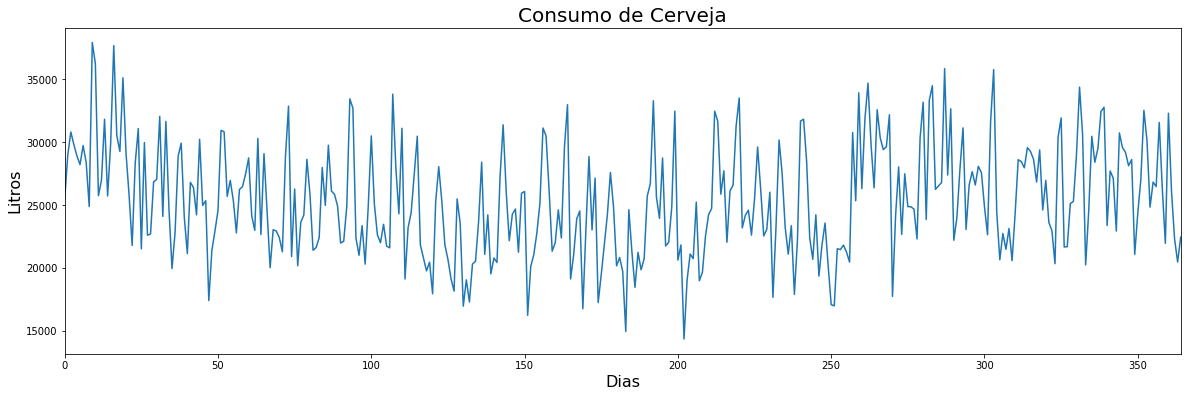

In [8]:
fig, ax = plt.subplots(figsize = (20, 6))
ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)
ax = dados['consumo'].plot()


# Boxplot


In [9]:
import seaborn as sns

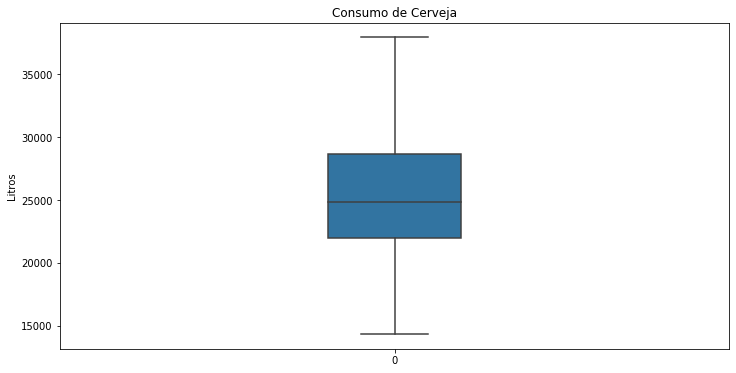

In [10]:
ax = sns.boxplot(data = dados['consumo'], orient = 'v', width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja')
ax.set_ylabel('Litros')
ax

# Box-plot com duas variáveis


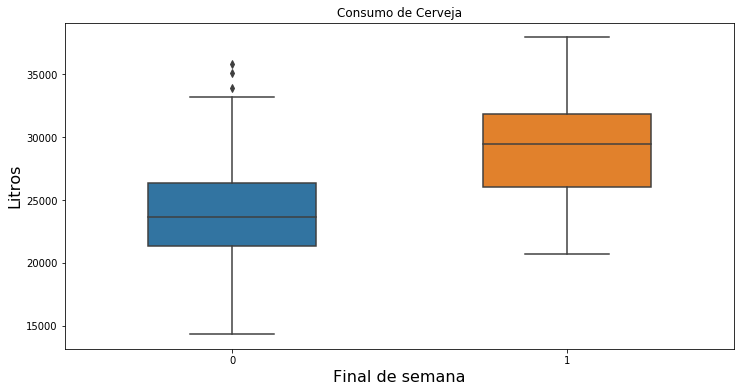

In [11]:
ax = sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja')
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Final de semana', fontsize = 16)
ax

# Distribuição de frequência

Text(0.5, 0, 'Consumo de Cerveja (Litros)')

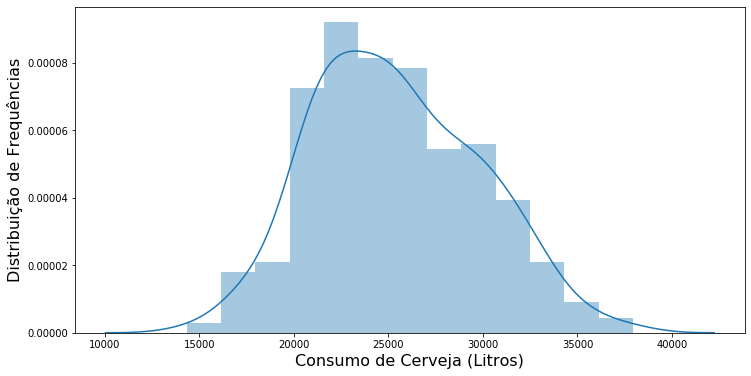

In [12]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Consumo de Cerveja (Litros)', fontsize = 16)

# Análise gráfica

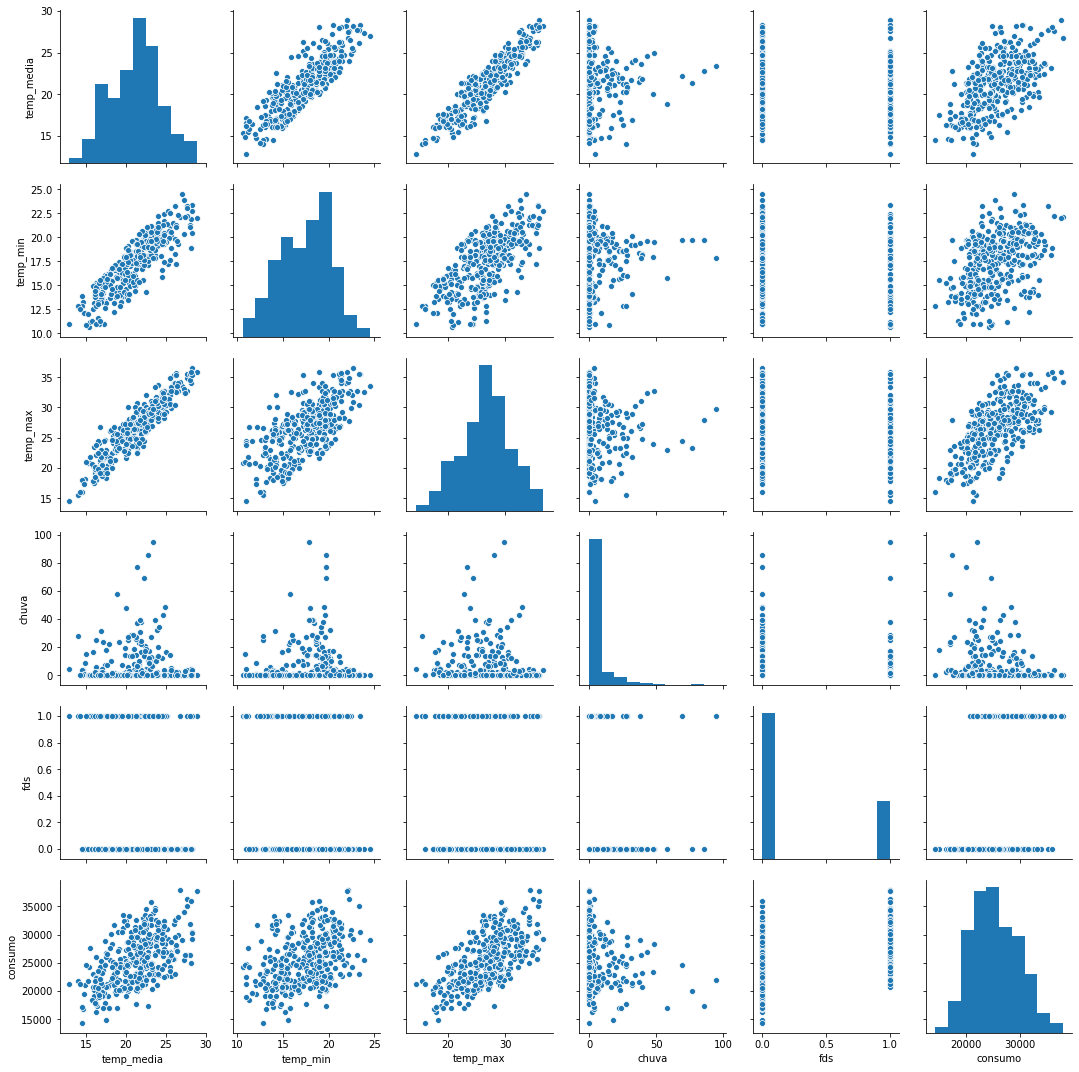

In [13]:
ax = sns.pairplot(dados)


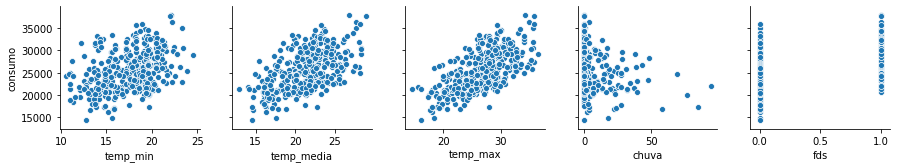

In [14]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])

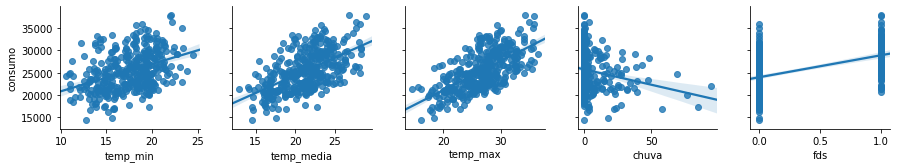

In [15]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')

# Criando datasets de treino e de teste

In [16]:
from sklearn.model_selection import train_test_split

### Nossa variável dependente

In [17]:
y = dados['consumo']

### Nossas variáveis explicativas

In [18]:
X = dados[['temp_max', 'chuva', 'fds']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [27]:
X_train.shape

(255, 3)

In [28]:
X_test.shape

(110, 3)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instanciando LinearRegression


In [25]:
modelo = LinearRegression()

# Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [30]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coeficiente de determinação - Rˆ2

In [34]:
print(f'Rˆ2 = {modelo.score(X_train, y_train).round(2)}')

Rˆ2 = 0.73


In [35]:
y_previsto = modelo.predict(X_test)

In [36]:
print(f'Rˆ2 = {metrics.r2_score(y_test, y_previsto).round(2)}')

Rˆ2 = 0.69


# Previsões pontuais

In [48]:
temp_max = 36
chuva = 0
fds = 0

entrada = [[temp_max, chuva, fds]]
print(f'{modelo.predict(entrada)[0].round(3)} litros')

30602.5 litros


In [49]:
temp_max = 36
chuva = 0
fds = 1

entrada = [[temp_max, chuva, fds]]
print(f'{modelo.predict(entrada)[0].round(3)} litros')

36003.583 litros


In [51]:
modelo.intercept_

5951.9763393124485

In [53]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [54]:
index=['Interceptor', 'Temperatura Máxima', 'Chuva', 'Final de Semana']

In [56]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns=['Parâmetro'])

,Parâmetro
Interceptor,5951.976339
Temperatura Máxima,684.736759
Chuva,-60.782435
Final de Semana,5401.083339


# Interceptor: Quando as variáveis explicativas são 0, temos ainda um consumo de cerveja de 5951.97 litros

# Temperatura Máxima: Quando Chuva e Final de Semana são constantes e com o acréscimo de 1C de temperatura implica em uma variação de 684.73 litros

# Chuva: Mantendo Temperatura Máxima e Final de semana constantes, o acréscimo de 1mm de chuva gera uma variação de -60.78 litros

# Final de Semana: Mantendo chuva e temperatura máxima constantes, o fato de ser ou não final de semana gera uma variação média de 5401.08 litros
